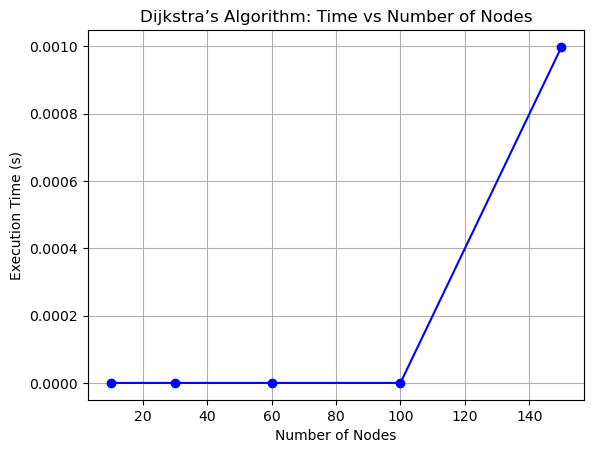

In [1]:
import heapq, random, time
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    dist = {v: float('inf') for v in graph}
    dist[start] = 0
    pq = [(0, start)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in graph[u]:
            new_d = d + w
            if new_d < dist[v]:
                dist[v] = new_d
                heapq.heappush(pq, (new_d, v))
    return dist

sizes = [10, 30, 60, 100, 150]
times = []

for n in sizes:
    graph = {f'N{i}': [] for i in range(n)}
    for u in graph:
        for _ in range(random.randint(2, 6)):
            v = random.choice(list(graph.keys()))
            if v != u:
                graph[u].append((v, random.randint(1, 20)))
    start = time.time()
    dijkstra(graph, 'N0')
    end = time.time()
    times.append(end - start)

plt.plot(sizes, times, marker='o', color='blue')
plt.title("Dijkstra’s Algorithm: Time vs Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.grid(True)
plt.show()
